In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
#Loading the data
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
final = train
len(final)

891

In [4]:
print(len(train))
print(len(test))

891
418


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train = train.drop(columns = 'Cabin',axis = 1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# **Handling NULL values or The Missing Values**

In [12]:
#Replacing Null values in Age column by the mean of age
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [13]:
#Replacing Null values in Embarked column by the mode
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace = True)

In [14]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
#Checking missing values in the test data
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test = test.drop('Cabin',axis  =1)

In [17]:
test['Age'].fillna(test['Age'].mean(),inplace = True)
test['Fare'].fillna(test['Fare'].mean(),inplace = True)

In [18]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
print(len(train))
print(len(test))

891
418


In [20]:
train.describe(include =  'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


# **Visualizing the data**

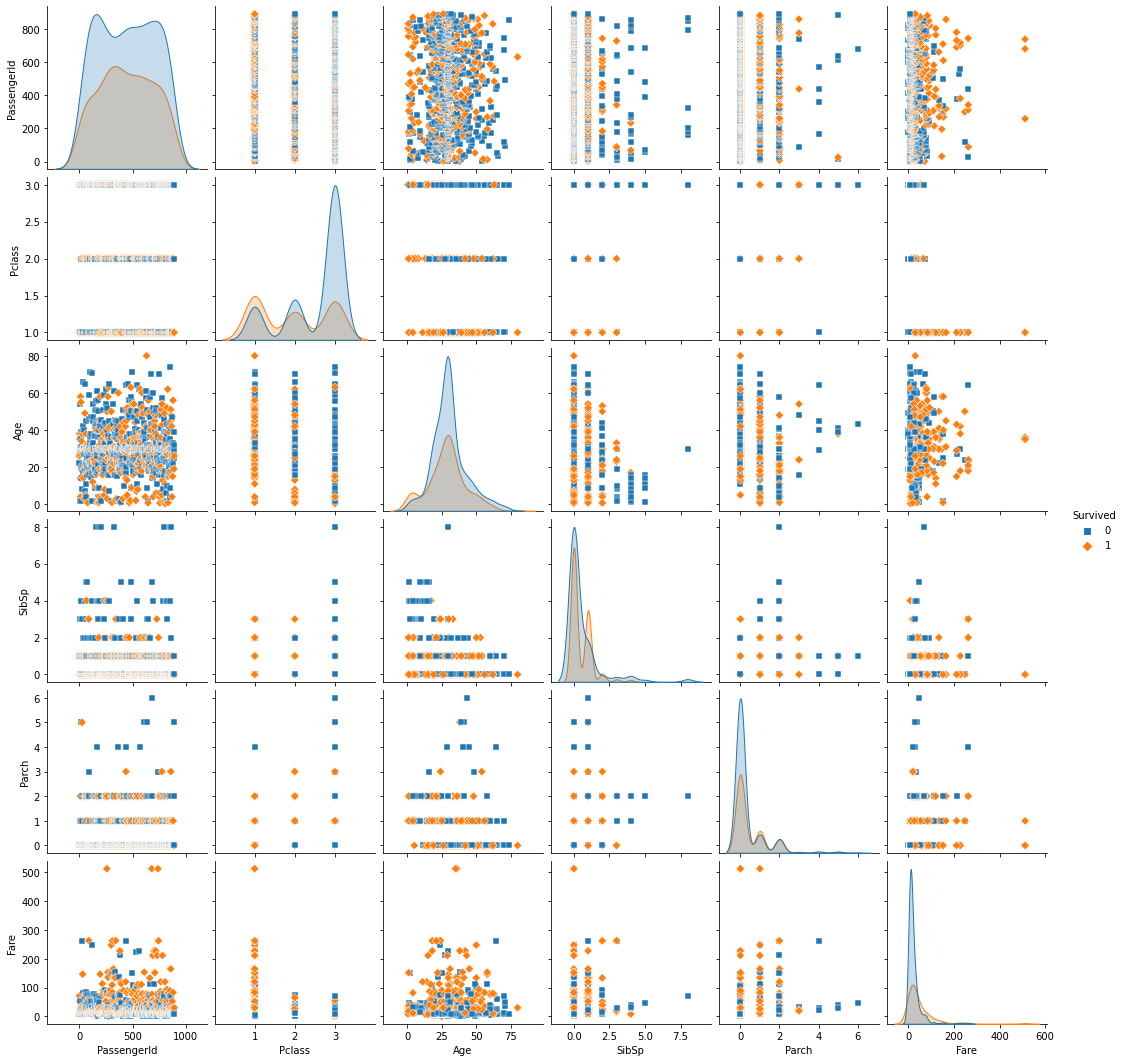

In [21]:
sns.pairplot(train,hue='Survived',markers=["s","D"])

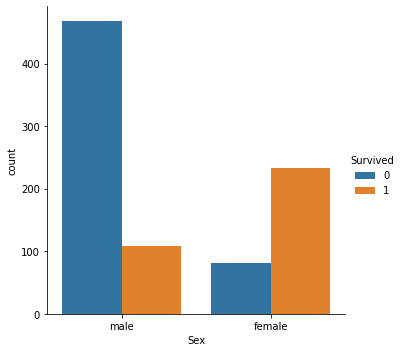

In [22]:
sns.catplot(x = 'Sex',hue = 'Survived',kind='count',data = train)

In [23]:
# Grouping the dataset by Pclass and survived 
stackedgroup = train.groupby(['Pclass','Survived'])

#unstacking the grouped dataset
pclass_unstack = stackedgroup.size().unstack()

<AxesSubplot:title={'center':'2D heat Map'}, xlabel='Survived', ylabel='Pclass'>

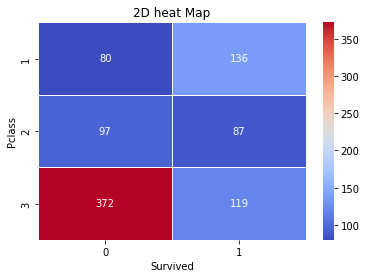

In [24]:
# 2D Representation of Data

axis = plt.axes()
axis.set_title('2D heat Map')
sns.heatmap( pclass_unstack , linewidth = 0.5 , cmap = 'coolwarm',annot = True ,fmt = 'd')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

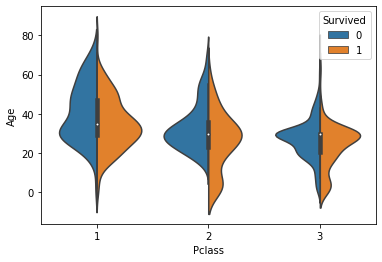

In [25]:
sns.violinplot(x ="Pclass", y ="Age", hue ="Survived",data = train, split = True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

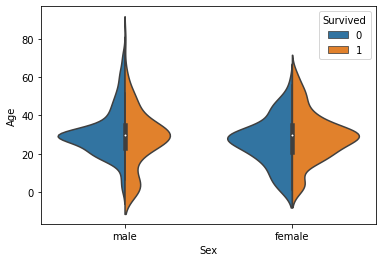

In [26]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = train, split = True)

<AxesSubplot:xlabel='FareRange', ylabel='Survived'>

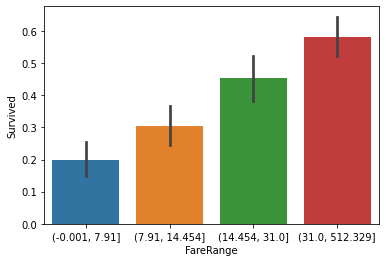

In [27]:
train['FareRange']= pd.qcut(train.Fare, q=4)

sns.barplot(x = 'FareRange',y = 'Survived',data = train)

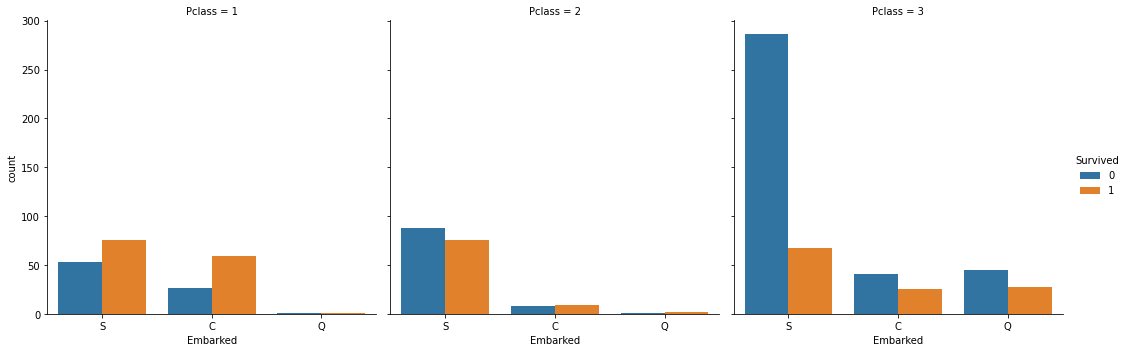

In [28]:
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = train)

<Figure size 1296x648 with 0 Axes>

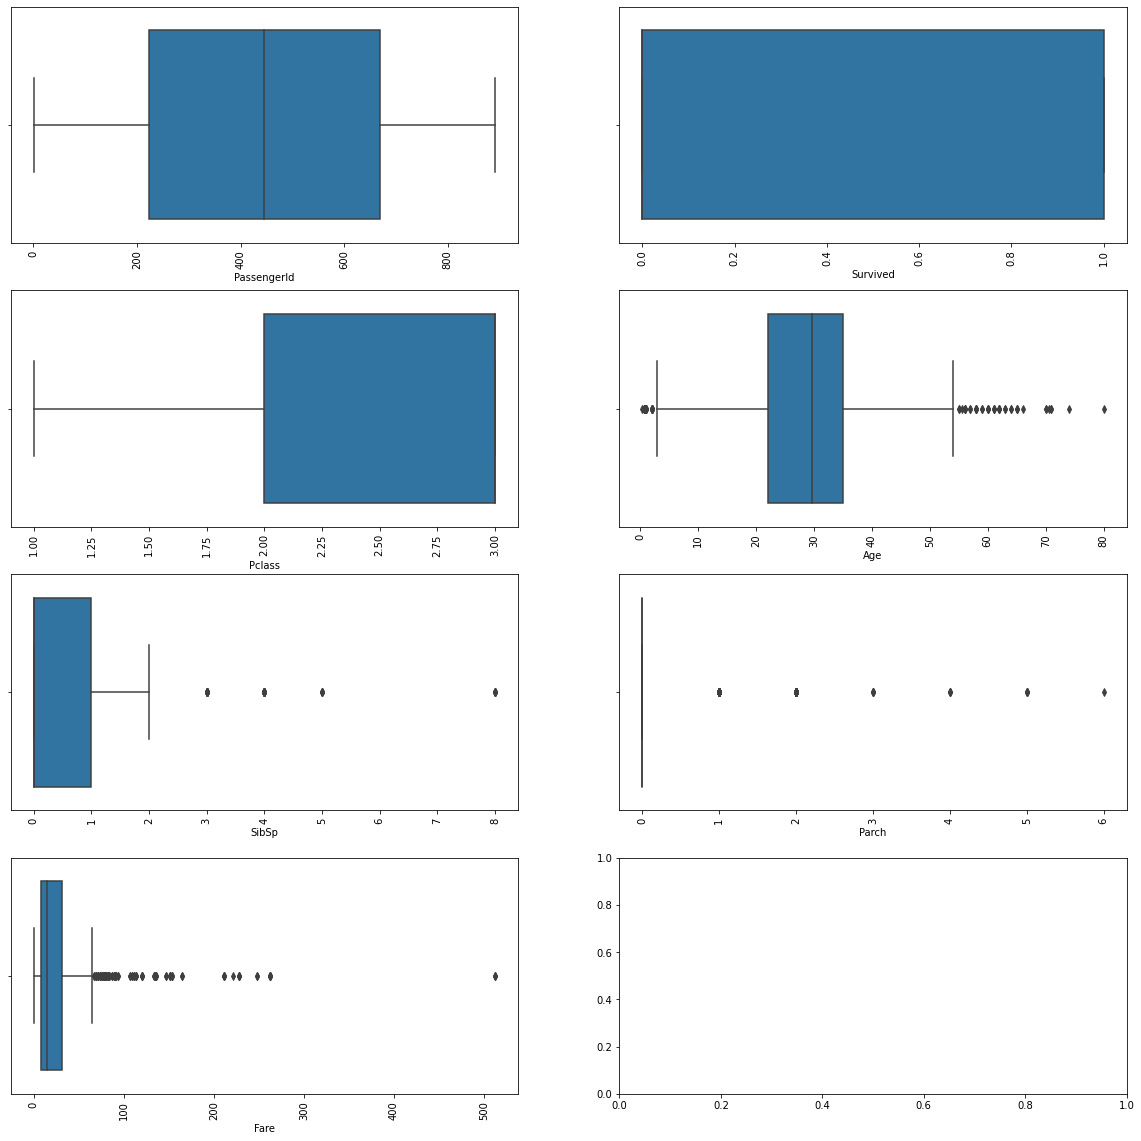

In [29]:
linear_variables = train.select_dtypes(include=[np.number]).columns
categorical_attribs = list(train.select_dtypes(exclude=[np.number]).columns)
def plot_boxplot(df, ft):
    sns.boxplot(df[ft])
    
fig = plt.figure(figsize=(18, 9))

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for variable, subplot in zip(linear_variables, ax.flatten()):
    sns.boxplot(x=train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# **Removing Outliers from the data**

In [30]:
#As we have extracted the outliers in every column, we have to remove them
def removeoutliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    
    #Inter Quartile Range
    iqr = q3 - q1 
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    ls =df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
    
    return ls

In [31]:
index_list = []
for feature in linear_variables:
    index_list.extend(removeoutliers(train,feature))

In [32]:
len(index_list)

441

In [33]:
def remove(df,ls):
    ls=sorted(set(ls))
    df = df.drop(ls)
    return df

In [34]:
train= remove(train , index_list)

In [35]:
train.shape

(577, 12)

# **Selection of Features**

In [36]:
train.corr()['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.268890
SibSp          0.097999
Age            0.006573
PassengerId   -0.050556
Pclass        -0.242189
Parch               NaN
Name: Survived, dtype: float64

In [37]:
X = train.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = train['Survived']
test=test.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [38]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [39]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareRange
784,3,male,25.000000,0,0,7.0500,S,"(-0.001, 7.91]"
687,3,male,19.000000,0,0,10.1708,S,"(7.91, 14.454]"
376,3,female,22.000000,0,0,7.2500,S,"(-0.001, 7.91]"
579,3,male,32.000000,0,0,7.9250,S,"(7.91, 14.454]"
713,3,male,29.000000,0,0,9.4833,S,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...
347,3,female,29.699118,1,0,16.1000,S,"(14.454, 31.0]"
411,3,male,29.699118,0,0,6.8583,Q,"(-0.001, 7.91]"
715,3,male,19.000000,0,0,7.6500,S,"(-0.001, 7.91]"
363,3,male,35.000000,0,0,7.0500,S,"(-0.001, 7.91]"


In [41]:
#Build pipe lines for different processors and modelling them for various Classification techniques

# linear regression pipe line 
lr_pipeline = Pipeline([("preprocessor",preprocessor),('lr',LogisticRegression())])

# Decision Tree Classifier Pipe Line
dt_pipeline = Pipeline([("preprocessor",preprocessor),('dt',DecisionTreeClassifier())])

# Random Forest Pipe Line
rf_pipeline = Pipeline([("preprocessor",preprocessor),('rf',RandomForestClassifier())])

# Knn Pipe Line
knn_pipeline = Pipeline([("preprocessor",preprocessor),('knn',KNeighborsClassifier())])

# support vector Regressor Pipe Line
svm_pipeline = Pipeline([("preprocessor",preprocessor),('svm',SVC())])

nb_pipeline = Pipeline([("preprocessor",preprocessor),('nb',GaussianNB())])

In [42]:
pipelines = [lr_pipeline, dt_pipeline, rf_pipeline, knn_pipeline, svm_pipeline, nb_pipeline ]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LogicticRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "Support Vector",5:"Gaussian Naive Bayes"}

In [43]:
# Fit the data
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [44]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results.append(cv_score)
    print("%s : %f " % (pipe_dict[i], cv_score.mean()))

LogicticRegression : -0.429322 
DecisionTree : -0.480666 
RandomForest : -0.463050 
KNeighbors : -0.463803 
Support Vector : -0.437665 
Gaussian Naive Bayes : -0.457447 


In [45]:
predict = lr_pipeline.predict(X_test)
lr_pipeline.score(X_test,y_test)

0.7655172413793103

In [46]:
import warnings
warnings.filterwarnings('ignore')
param_grid = { 
    'lr__C': np.logspace(-3,3,7),
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'lr__penalty':['l1','l2']}
grid_search = GridSearchCV(lr_pipeline,param_grid,cv = 10, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Sex', 'Embarked'], dtype='object'))])),
                                       ('lr', LogisticReg

In [47]:
search_score = cross_val_score(grid_search,
                               X_train,
                               y_train,
                               scoring="neg_mean_squared_error",
                               cv=10)
search_rmse_score=np.sqrt(-search_score)
print("Scores: ", search_rmse_score)
print("Mean: ", search_rmse_score.mean())
print("Standard Deviation: ", search_rmse_score.std())

Scores:  [0.45226702 0.39886202 0.52827054 0.48224282 0.43133109 0.52827054
 0.26413527 0.43133109 0.40347329 0.34099717]
Mean:  0.4261180863889934
Standard Deviation:  0.07713496945933851


In [48]:
grid_search.best_params_

{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}

In [49]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)

nan {'lr__C': 0.001, 'lr__penalty': 'l1', 'lr__solver': 'newton-cg'}
nan {'lr__C': 0.001, 'lr__penalty': 'l1', 'lr__solver': 'lbfgs'}
0.5313630802421236 {'lr__C': 0.001, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
0.5313630802421236 {'lr__C': 0.001, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}
0.5313630802421236 {'lr__C': 0.001, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
0.5 {'lr__C': 0.001, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
nan {'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'newton-cg'}
nan {'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'lbfgs'}
0.5313630802421236 {'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
0.5023201980762358 {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}
0.5023201980762358 {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
0.48590057187713676 {'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
nan {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'newton-cg'}
nan {'lr__C': 0.1, 'l

# **Evaluating The Model **

In [50]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

In [51]:
print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        94
           1       0.85      0.45      0.59        51

    accuracy                           0.78       145
   macro avg       0.81      0.70      0.72       145
weighted avg       0.79      0.78      0.76       145



In [52]:
survival=final_model.predict(test)

In [53]:
# final_dataframe = pd.DataFrame({'PassengerId': final.PassengerId, 'Survived': survival.values})
# # you could use any filename. We choose submission here
# final_dataframe.to_csv('submission.csv', index=False)

final_df = pd.DataFrame()
final_df['PassengerId'] = pd.Series(final.PassengerId)
final_df['Survived']  = pd.Series(survival)
final_df['PassengerId'] = final_df['PassengerId']+891
final_df = final_df.dropna()
final_df.to_csv('submission.csv', index=False)